In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler


In [186]:
df=pd.read_csv('Mumbai.csv')

In [187]:
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,8306999,1184,Hosa Road,2,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
3420,4883000,655,Hosa Road,1,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
3421,11500000,1680,Hosa Road,3,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
3422,8378000,1195,Hosa Road,2,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0


In [188]:
df=df.drop(['Location'],axis=1)

In [189]:
df.head()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,4850000,720,1,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,1,1,1,1,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,1,1,1,1,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,1,1,1,0,0,1,0,1,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,1,1,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0


EDA

In [190]:
missing = df.isnull().sum().sort_values(ascending=False)

print(missing)

Price                  0
LiftAvailable          0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
BED                    0
StaffQuarter           0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Cafeteria              0
CarParking             0
Area                   0
RainWaterHarvesting    0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
IndoorGames            0
PowerBackup            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
Stadium                0
dtype: int64


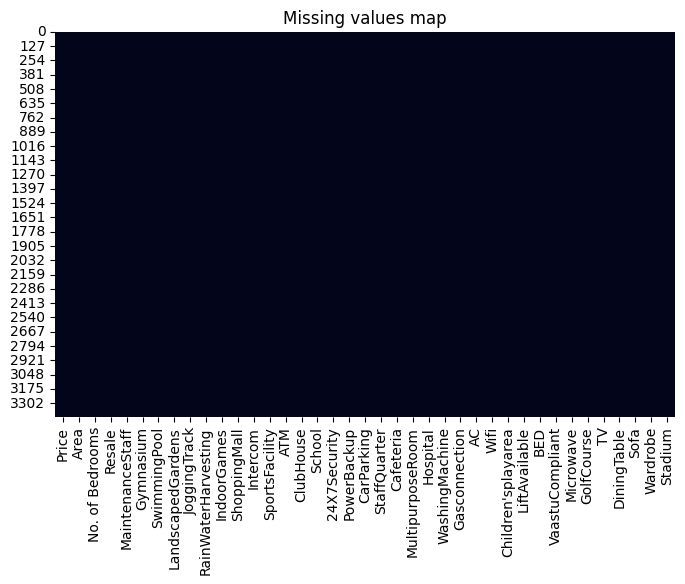

In [191]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values map')
plt.show()

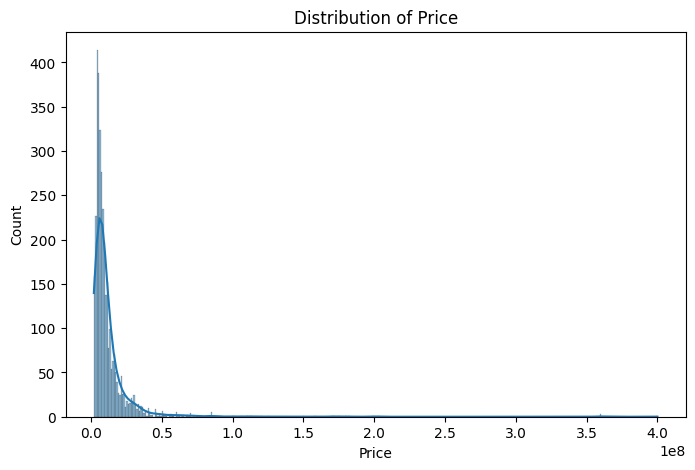

In [192]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'].dropna(), kde=True)
plt.title('Distribution of Price')
plt.show()

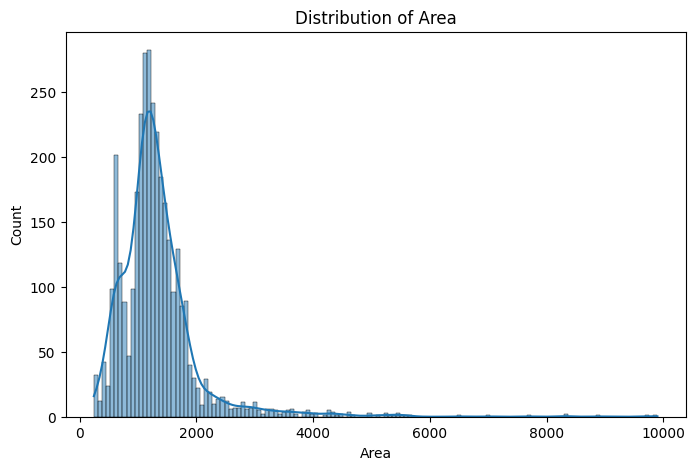

In [193]:
plt.figure(figsize=(8,5))
sns.histplot(df['Area'].dropna(), kde=True)
plt.title('Distribution of Area')
plt.show()

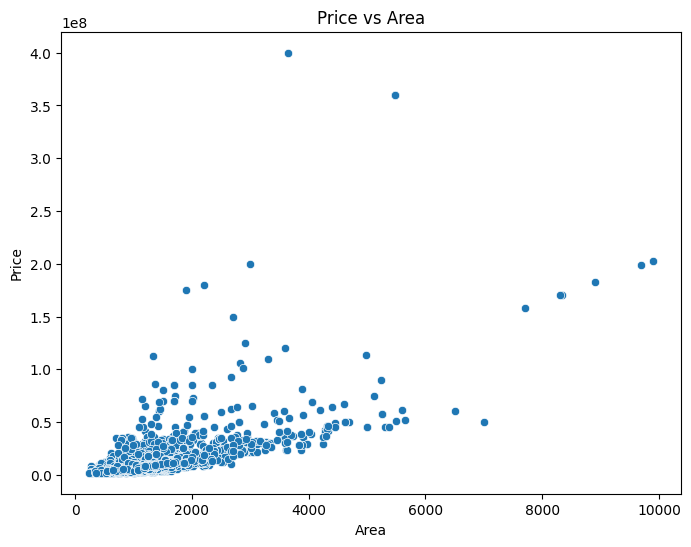

In [194]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Price vs Area')
plt.show()

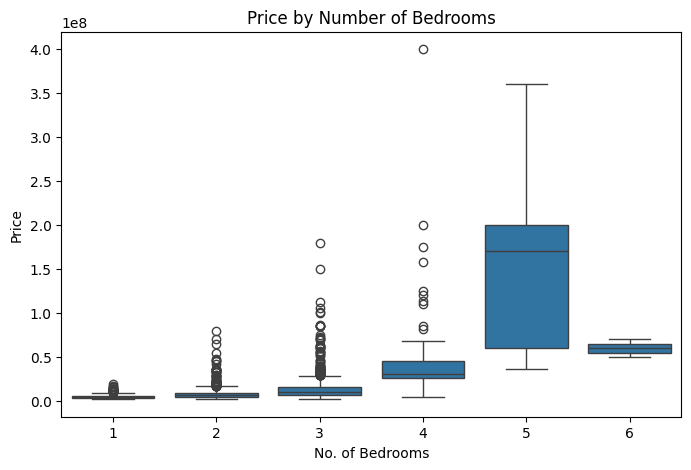

In [195]:
plt.figure(figsize=(8,5))
sns.boxplot(x='No. of Bedrooms', y='Price', data=df)
plt.title('Price by Number of Bedrooms')
plt.show()

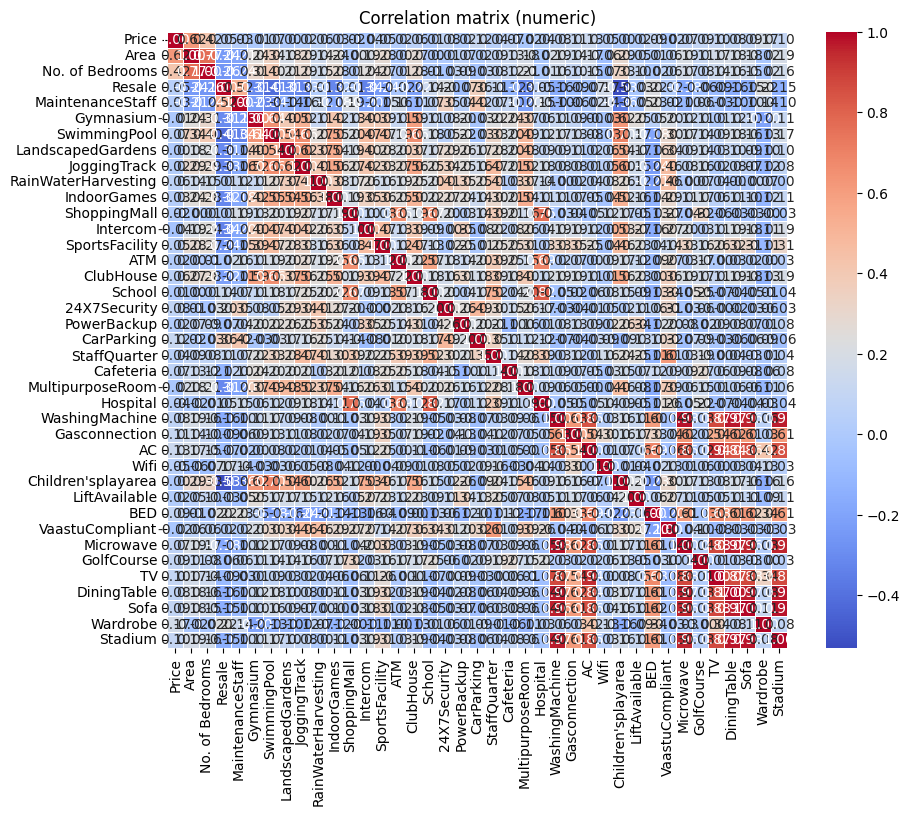

In [196]:
plt.figure(figsize=(10,8))
num_corr = df.corr()
sns.heatmap(num_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix (numeric)')
plt.show()

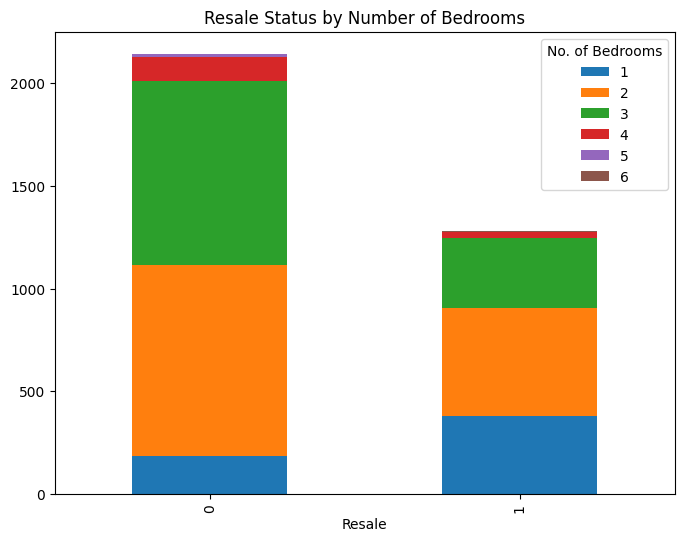

In [197]:
ct = pd.crosstab(df['Resale'], df['No. of Bedrooms'] if 'No. of Bedrooms' in df.columns else df['Resale'])
ct.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Resale Status by Number of Bedrooms')
plt.show()

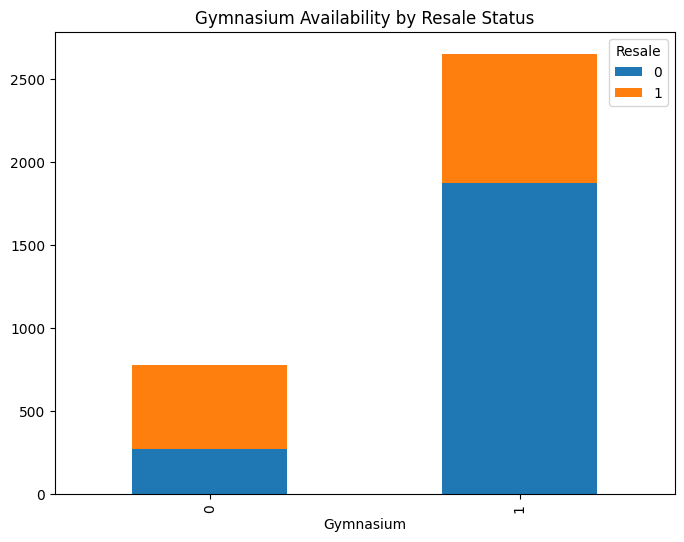

In [198]:
ct2 = pd.crosstab(df['Gymnasium'], df['Resale'] if 'Resale' in df.columns else df['Gymnasium'])
ct2.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Gymnasium Availability by Resale Status')
plt.show()

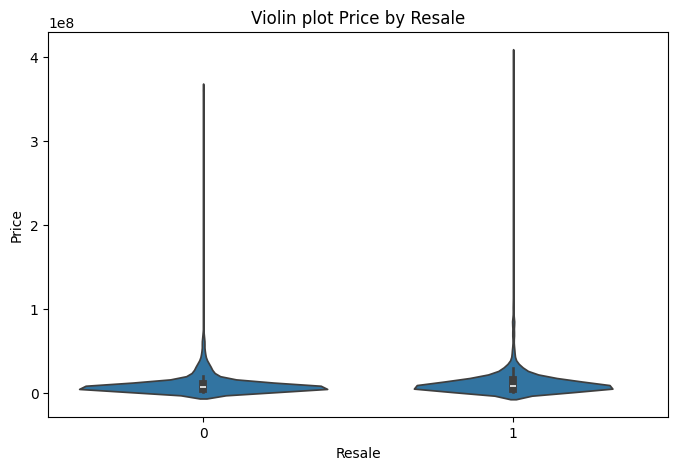

In [199]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Resale' if 'Resale' in df.columns else df.index, y='Price', data=df)
plt.title('Violin plot Price by Resale')
plt.show()

C:\Users\tp338\AppData\Local\Temp\ipykernel_11320\443052364.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'].dropna(), shade=True)


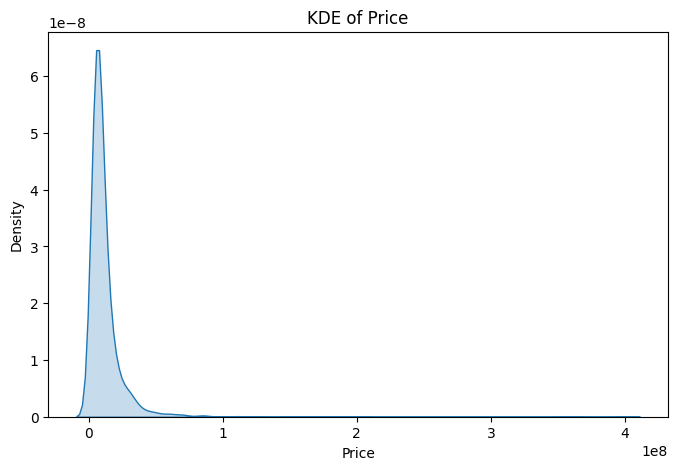

In [200]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Price'].dropna(), shade=True)
plt.title('KDE of Price')
plt.show()

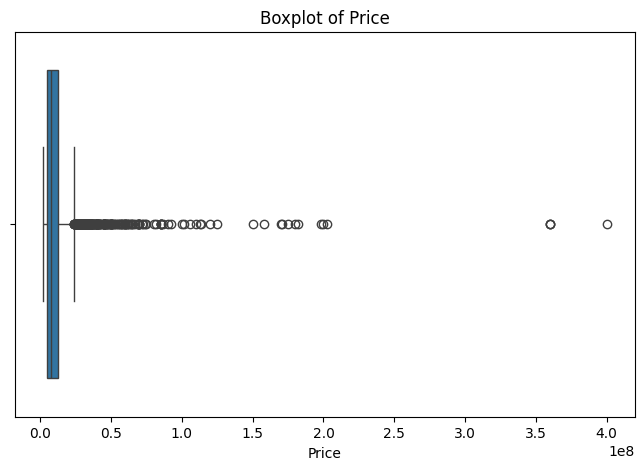

In [201]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()

<Figure size 1000x600 with 0 Axes>

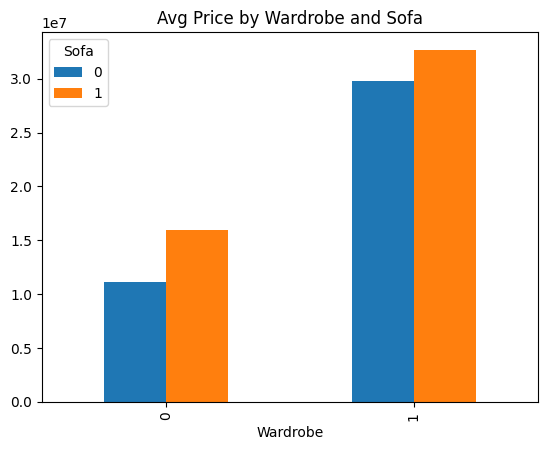

In [202]:
plt.figure(figsize=(10,6))
df.groupby(['Wardrobe', 'Sofa'])['Price'].mean().unstack().plot(kind='bar')
plt.title('Avg Price by Wardrobe and Sofa')
plt.show()

Prepare  data

In [203]:
x=df.drop('Price', axis=1)
y=df['Price']

In [204]:
ndf=x.copy()
print(ndf['Area'])

0        720
1        600
2        650
3        650
4        665
        ... 
3419    1184
3420     655
3421    1680
3422    1195
3423     820
Name: Area, Length: 3424, dtype: int64


In [214]:
s= MinMaxScaler()
x=s.fit_transform(ndf.select_dtypes(include=['float64','int64']))

In [215]:
x=pd.DataFrame(x, columns=ndf.select_dtypes(include=['float64','int64']).columns)

In [216]:
x.head()

,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,0.049197,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.036769,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.041947,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.041947,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.043501,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [218]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
r2_value = r2_score(y_test, y_pred)
print(r2_value)

0.37490668189005183


In [219]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
r2_value = r2_score(y_test, y_pred_svr) 
print(r2_value)

-0.0837359746231574


In [220]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_score_dt = r2_score(y_test, y_pred_dt)
print(r2_score_dt)

0.364779545630985


In [221]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_score_rf = r2_score(y_test, y_pred_rf)
print(r2_score_rf)

0.4240501687267776


In [222]:

rf = RandomForestRegressor(random_state=42)

random_grid = {
    'n_estimators': np.arange(50, 1001, 50),
    'max_depth': [None] + list(np.arange(5, 51, 5)),
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 2),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

random_search = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,scoring='neg_root_mean_squared_error',cv=5,verbose=1,random_state=42,n_jobs=-1)

random_search.fit(X_train, y_train)

best_random_forest = random_search.best_estimator_
print("RandomizedSearchCV Best Params:", random_search.best_params_)
print("RandomizedSearchCV Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\tp338\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
195 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tp338\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tp338\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\tp338\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    valid

RandomizedSearchCV Best Params: {'n_estimators': 350, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'poisson', 'bootstrap': False}
RandomizedSearchCV Score: -10908582.85539978


In [223]:
grid_params = {
    'n_estimators': [random_search.best_params_['n_estimators'] - 50,
                     random_search.best_params_['n_estimators'],
                     random_search.best_params_['n_estimators'] + 50],
    'max_depth': [random_search.best_params_['max_depth'],
                  None],
    'min_samples_split': [random_search.best_params_['min_samples_split'] - 1,
                          random_search.best_params_['min_samples_split'],
                          random_search.best_params_['min_samples_split'] + 1],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf'] - 1,
                         random_search.best_params_['min_samples_leaf'],
                         random_search.best_params_['min_samples_leaf'] + 1],
    'max_features': [random_search.best_params_['max_features']],
    'bootstrap': [random_search.best_params_['bootstrap']],
    'criterion': [random_search.best_params_['criterion']]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=grid_params,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_grid_rf = grid_search.best_estimator_
print("GridSearchCV Best Params:", grid_search.best_params_)
print("GridSearchCV Score:", grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\tp338\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tp338\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tp338\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\tp338\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    valida

GridSearchCV Best Params: {'bootstrap': False, 'criterion': 'poisson', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 300}
GridSearchCV Score: -10903106.777925266


In [228]:
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
  
    r2 = r2_score(y_test, preds)
    return r2

In [229]:

print("RandomizedSearchCV Model:", evaluate(best_random_forest, X_test, y_test))
print("GridSearchCV Model:", evaluate(best_grid_rf, X_test, y_test))

RandomizedSearchCV Model: 0.41814412823883484
GridSearchCV Model: 0.4192900215919313
